<a href="https://www.kaggle.com/code/tonysiu/lab03-02-siu?scriptVersionId=119097052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lab 3: Linear Regression

In [1]:
housing = '/kaggle/input/lab3ds/Lab03/housing.csv'
insurance = '/kaggle/input/lab3ds/Lab03/insurance.csv'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [3]:
df = pd.read_csv(housing)

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [4]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [5]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873205
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097968
MSE is: 0.020220019584503236
RMSE is: 0.14219711524677017


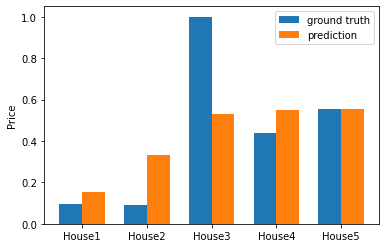

In [6]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [7]:
# your code

insur = pd.read_csv(insurance)
insur.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insur.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
num_cols = insur._get_numeric_data().columns
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [11]:
cat_cols = insur.select_dtypes(include=['object']).columns
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
# 1. convert categorical features to numerical values
dfs = [insur.drop(cat_cols,axis=1)]
labelencoder = LabelEncoder()
for col in cat_cols:
    dfs.append(pd.get_dummies(insur[col]))

insur = pd.concat(dfs,axis=1)
insur.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [13]:
features = insur.columns.tolist()
features.remove('charges')
features

['age',
 'bmi',
 'children',
 'female',
 'male',
 'no',
 'yes',
 'northeast',
 'northwest',
 'southeast',
 'southwest']

In [14]:
# your code
X_train,X_test,y_train,y_test = train_test_split(insur[features],
                                                 insur.charges,
                                                 test_size=0.2,
                                                 random_state=42)
X_train.shape

(1070, 11)

In [15]:
X_test.shape

(268, 11)

In [16]:
y_train.shape

(1070,)

In [17]:
y_test.shape

(268,)

In [18]:
# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [19]:
# your code
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 13355.615319343251
coefficients  is [ 3.70438760e+03  1.97099822e+03  5.31950715e+02  3.38790677e+16
  3.38790677e+16 -4.00025411e+15 -4.00025411e+15 -3.09289208e+17
 -3.04918341e+17 -3.15233198e+17 -3.08120680e+17]
prediction for training set:
MAE is: 4185.38531617639
MSE is: 37310354.1082034
RMSE is: 6108.220207900449


### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 4168.065949866944
MSE is: 33756701.950837135
RMSE is: 5810.051802767092


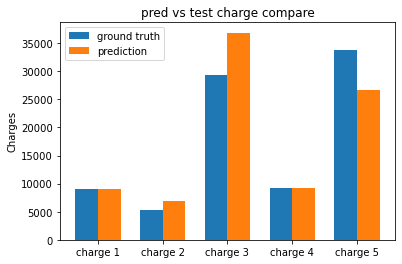

In [20]:
# your code
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

sample = 5
labels = [f'charge {i+1}' for i in range(sample)]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[:sample], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[:sample], width, label='prediction')

ax.set_ylabel('Charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("pred vs test charge compare")
ax.legend()

plt.show()

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7825637502704756

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [22]:
# your code
alpha = 0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

              
print("bias is "+str(ridge.intercept_))
print("coefficients  is "+str(ridge.coef_))

y_train_pred = ridge.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 12876.451901054035
coefficients  is [ 3.61535109e+03  2.35249773e+03 -1.58492308e+02 -2.45931920e+18
 -2.45931920e+18 -5.66179868e+18 -5.66179868e+18 -4.09171741e+17
 -4.03389337e+17 -4.17035296e+17 -4.07625846e+17]
prediction for training set:
MAE is: 4735.796141036573
MSE is: 43115572.29309023
RMSE is: 6566.244915710214


prediction for testing set:
MAE is: 4584.033882064437
MSE is: 39254802.90588789
RMSE is: 6265.365344964959


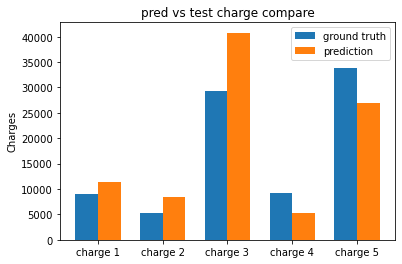

In [23]:
y_test_pred = ridge.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

sample = 5
labels = [f'charge {i+1}' for i in range(sample)]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[:sample], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[:sample], width, label='prediction')

ax.set_ylabel('Charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("pred vs test charge compare")
ax.legend()

plt.show()

In [24]:
r2_score(y_test,y_test_pred)

0.7471489619999376

In [25]:
def test_lambda(
    X_train:np.ndarray,
    y_train:np.ndarray,
    X_test:np.ndarray,
    y_test:np.ndarray,
)->None:
    alphas = list(range(0,10000,1000))
    for alpha in alphas:
        
        ridge = Ridge(alpha=(alpha+1))
        ridge.fit(X_train,y_train)


        print("bias is "+str(ridge.intercept_))
        print("coefficients  is "+str(ridge.coef_))

        y_train_pred = ridge.predict(X_train)

        mae = mean_absolute_error(y_train_pred,y_train)
        mse = mean_squared_error(y_train_pred,y_train)
        rmse = np.sqrt(mse)

        print('prediction for training set:')
        print('MAE is: {}'.format(mae))
        print('MSE is: {}'.format(mse))
        print('RMSE is: {}'.format(rmse))
        y_test_pred = ridge.predict(X_test)

        mae = mean_absolute_error(y_test_pred,y_test)
        mse = mean_squared_error(y_test_pred,y_test)
        rmse = np.sqrt(mse)

        print('prediction for testing set:')
        print('MAE is: {}'.format(mae))
        print('MSE is: {}'.format(mse))
        print('RMSE is: {}'.format(rmse))
        print(f"Residual squared acc: {r2_score(y_test,y_test_pred)}")
        
        fig, ax = plt.subplots()
        scatter = ax.scatter(y_test_pred,y_test, label='ground truth')

        ax.set_ylabel('Pred')
        ax.set_xlabel('Test')
        ax.set_title("pred vs test charge compare")
        ax.legend()

        plt.show()

bias is 13346.089736364485
coefficients  is [ 3.61157860e+03  2.03449755e+03  5.16685303e+02  4.47170585e+00
 -4.47170585e+00 -4.77689215e+03  4.77689215e+03  1.99352521e+02
  3.84877896e+01 -8.61052333e+01 -1.50103486e+02]
prediction for training set:
MAE is: 4208.597061573471
MSE is: 37277717.651651144
RMSE is: 6105.548104114088
prediction for testing set:
MAE is: 4181.772383375151
MSE is: 33601075.67455839
RMSE is: 5796.6434834789
Residual squared acc: 0.7835661821408255


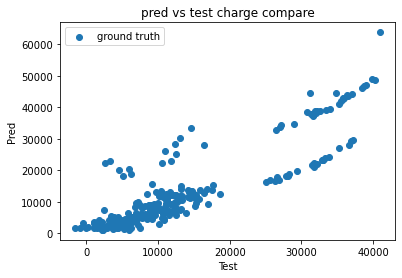

bias is 13346.089736364485
coefficients  is [ 1846.55453559  1111.35718231   345.35734786   -74.53686201
    74.53686201 -3217.36323985  3217.36323985    55.78657832
   -53.78694797   106.22041618  -111.44257217]
prediction for training set:
MAE is: 5217.720754335822
MSE is: 50728428.85018913
RMSE is: 7122.389265561742
prediction for testing set:
MAE is: 5360.964125345872
MSE is: 50684772.48600514
RMSE is: 7119.3238784315145
Residual squared acc: 0.6735253679757707


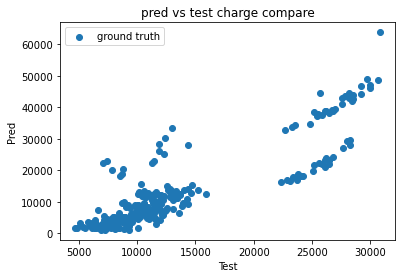

bias is 13346.089736364485
coefficients  is [ 1232.65943118   769.11328233   253.08005597   -85.93488797
    85.93488797 -2431.75380599  2431.75380599    24.947831
   -61.78965413   123.23767254   -89.97741284]
prediction for training set:
MAE is: 5933.046326134485
MSE is: 65996815.14699512
RMSE is: 8123.84238811876
prediction for testing set:
MAE is: 6187.3182424032775
MSE is: 68303857.26342607
RMSE is: 8264.614767998934
Residual squared acc: 0.5600359719071493


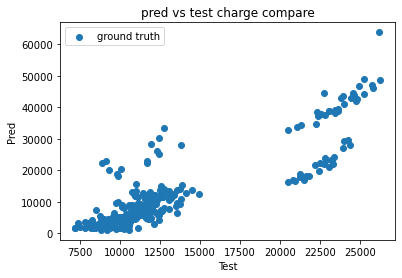

bias is 13346.089736364485
coefficients  is [  923.1215204    588.94703709   199.08217101   -83.5222166
    83.5222166  -1955.71089307  1955.71089307    13.76407622
   -58.34236745   116.56774716   -75.33881205]
prediction for training set:
MAE is: 6426.224668409973
MSE is: 77689331.96036193
RMSE is: 8814.15520400917
prediction for testing set:
MAE is: 6777.757416450813
MSE is: 81549276.17134313
RMSE is: 9030.46378495275
Residual squared acc: 0.47471856685885794


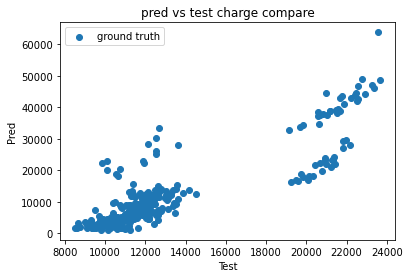

bias is 13346.089736364485
coefficients  is [  737.15603416   477.45015635   163.93645551   -77.95208168
    77.95208168 -1635.90537003  1635.90537003     8.55610911
   -53.17709941   106.30141371   -64.71936197]
prediction for training set:
MAE is: 6788.024783345564
MSE is: 86549037.70585293
RMSE is: 9303.17352874023
prediction for testing set:
MAE is: 7192.601722921911
MSE is: 91500379.49627426
RMSE is: 9565.583071421954
Residual squared acc: 0.410620759235493


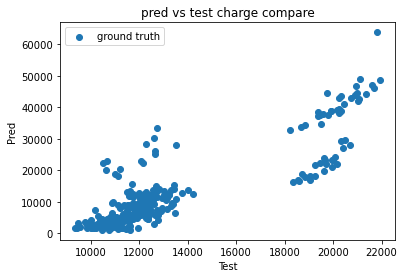

bias is 13346.089736364485
coefficients  is [  613.26923902   401.55859154   139.29526859   -71.99263834
    71.99263834 -1406.1363365   1406.1363365      5.74212825
   -48.22573423    96.41941347   -56.68450242]
prediction for training set:
MAE is: 7067.9121393602045
MSE is: 93408024.6906465
RMSE is: 9664.78270271228
prediction for testing set:
MAE is: 7499.579467550813
MSE is: 99165791.80693537
RMSE is: 9958.202237700105
Residual squared acc: 0.36124571934302674


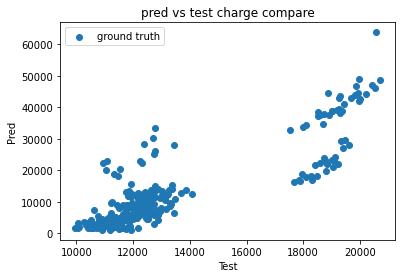

bias is 13346.089736364485
coefficients  is [  524.89696797   346.53378256   121.07748814   -66.42283118
    66.42283118 -1233.02816385  1233.02816385     4.0635393
   -43.86941433    87.7136854    -50.40390448]
prediction for training set:
MAE is: 7288.339134313997
MSE is: 98847154.71197839
RMSE is: 9942.190639490795
prediction for testing set:
MAE is: 7740.868780973052
MSE is: 105224262.69401139
RMSE is: 10257.8878281063
Residual squared acc: 0.322221433419009


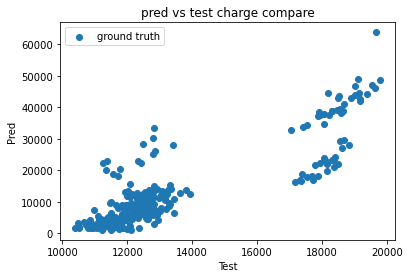

bias is 13346.089736364485
coefficients  is [  458.71511119   304.79659613   107.06664012   -61.43085731
    61.43085731 -1097.90401346  1097.90401346     2.98893039
   -40.1190904     80.21517949   -45.36496849]
prediction for training set:
MAE is: 7465.847066483295
MSE is: 103254735.22439611
RMSE is: 10161.433718939277
prediction for testing set:
MAE is: 7934.238910759473
MSE is: 110122107.94930017
RMSE is: 10493.908135165857
Residual squared acc: 0.29067305805886434


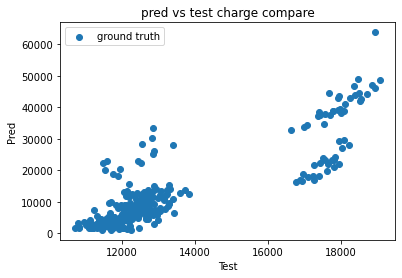

bias is 13346.089736364485
coefficients  is [ 407.31389466  272.04628725   95.9585843   -57.01752934   57.01752934
 -989.48931229  989.48931229    2.26355775  -36.89925289   73.77597807
  -41.23537723]
prediction for training set:
MAE is: 7610.6586984581545
MSE is: 106893678.36558224
RMSE is: 10338.939905308582
prediction for testing set:
MAE is: 8091.498478539622
MSE is: 114158635.61343123
RMSE is: 10684.504462698831
Residual squared acc: 0.2646726674254314


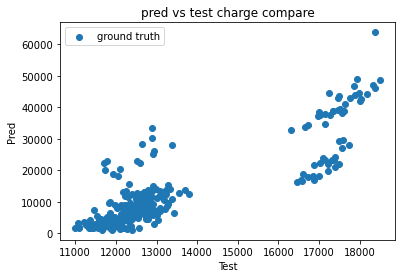

bias is 13346.089736364485
coefficients  is [ 366.24760415  245.65924268   86.93690611  -53.12692939   53.12692939
 -900.57259472  900.57259472    1.75334539  -34.12391276   68.22523994
  -37.79085674]
prediction for training set:
MAE is: 7731.105205650876
MSE is: 109946341.10626104
RMSE is: 10485.53008227343
prediction for testing set:
MAE is: 8225.537252136248
MSE is: 117540140.9416734
RMSE is: 10841.593099801956
Residual squared acc: 0.2428914567466095


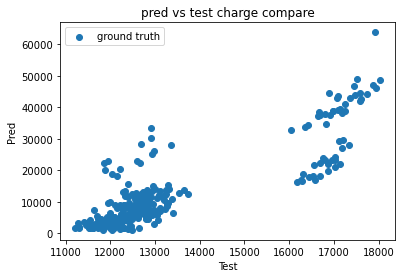

In [26]:
test_lambda(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)